# PROJECT -1

### 1. Data Loading

#### a).Load the dataset using pandas.

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("student.csv", sep=";")

#### b). Display the first few rows using .head().

In [3]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 2. Data Exploration

#### a). Check for missing values

In [4]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### b). Display column data types 

In [5]:
dataset.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#### c). dataset's size using .shape.

In [6]:
dataset.shape

(395, 33)

### 3. Data Cleaning

#### a). Handle missing values

In [7]:
dataset.fillna(dataset.median(numeric_only=True), inplace=True)

#### b). Remove duplicate entries

In [8]:
dataset.drop_duplicates(inplace=True)

### 4. Data Analysis Questions

#### a). What is the average score in math (G3)?

In [9]:
avg_score_G3 = dataset["G3"].mean()
avg_score_G3

10.415189873417722

#### b). How many students scored above 15 in their final grade (G3)?

In [10]:
scored_above_15_G3 = (dataset["G3"] > 15).sum()
scored_above_15_G3 

40

#### c). Is there a correlation between study time (study time) and the final grade (G3)?

In [11]:
import numpy as np

In [12]:
dataset["studytime"].corr(dataset["G3"])

0.09781968965319626

#### d). Which gender has a higher average final grade (G3)?

In [13]:
avg = dataset.groupby("sex")["G3"].mean()
avg

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

In [14]:
if avg["F"] > avg["M"]:
    print("Females have a higher average final grade.")
elif avg["F"] < avg["M"]:
    print("Males have a higher average final grade.")
else:
    print("Both genders have the same average final grade.")

Males have a higher average final grade.


### 5. Data Visualization

#### a).Plot a histogram of final grades (G3).

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

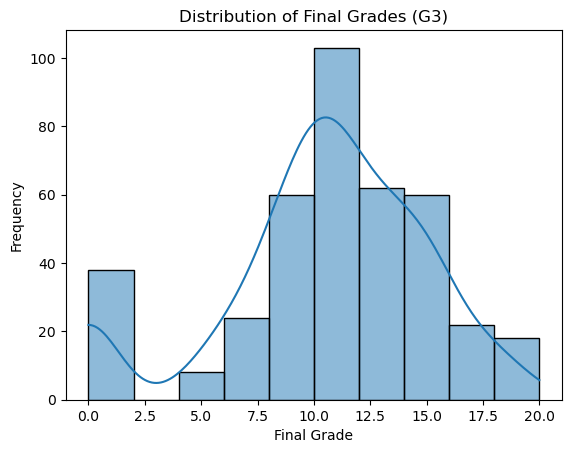

In [16]:
sns.histplot(data=dataset["G3"], bins=10, kde = True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

#### b). Create a scatter plot between study time (study time) and final grade (G3).

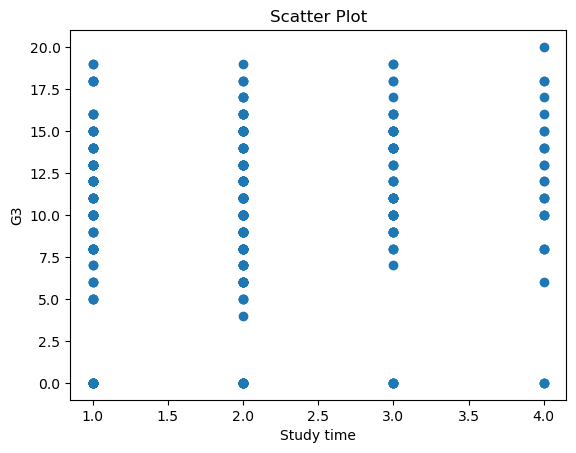

In [17]:
plt.scatter(x=dataset["studytime"], y = dataset["G3"])
plt.title("Scatter Plot")
plt.xlabel("Study time")
plt.ylabel("G3")
plt.show()

#### c). Create a bar chart comparing the average scores of male and female students.

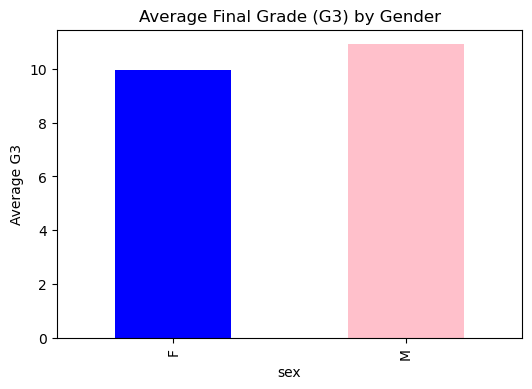

In [18]:
plt.figure(figsize=(6,4))
avg.plot(kind='bar', color=['blue', 'pink'])
plt.title("Average Final Grade (G3) by Gender")
plt.ylabel("Average G3")
plt.show()